In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


In [2]:
#fetch data
mydata = pd.read_csv("../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
mydata.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
mydata.tail()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN
20036,1031,22-24,Man,Pakistan,Master’s degree,Machine Learning Engineer,< 1 years,Python,NaN,NaN,...,Weights & Biases,NaN,NaN,NaN,NaN,NaN,Trains,NaN,NaN,NaN


In [5]:
mydata.shape

(20037, 355)

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20037 entries, 0 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.3+ MB


In [7]:
mydata.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
count,20037,20037,20037,20037,19570,19278,19121,15531,4278,7536,...,1178,495,431,3200,558,481,847,520,3083,252
unique,5168,12,6,56,8,14,8,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,565,25-29,Man,India,Master’s degree,Student,3-5 years,Python,R,SQL,...,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Trains,Domino Model Monitor,None,Other
freq,34,4011,15789,5851,7859,5171,4546,15530,4277,7535,...,1177,494,430,3199,557,480,846,519,3082,251


In [8]:
mydata.isnull().sum()

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q3                                         0
Q4                                       467
                                       ...  
Q35_B_Part_7                           19556
Q35_B_Part_8                           19190
Q35_B_Part_9                           19517
Q35_B_Part_10                          16954
Q35_B_OTHER                            19785
Length: 355, dtype: int64

In [9]:
#drop the questions row
mydata=mydata.drop(0)

In [10]:
mydata

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


#   Exploratory Data Analysis

**Demographic info**

In [11]:
#Function to show the percentage of a bar
def bar_percentage(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 14)
    plt.show()

In [12]:
#age percentages 
mydata['Q1'].value_counts(normalize=True)

25-29    0.200190
22-24    0.188960
18-21    0.173138
30-34    0.140297
35-39    0.099371
40-44    0.069724
45-49    0.049311
50-54    0.034837
55-59    0.020513
60-69    0.019864
70+      0.003793
Name: Q1, dtype: float64

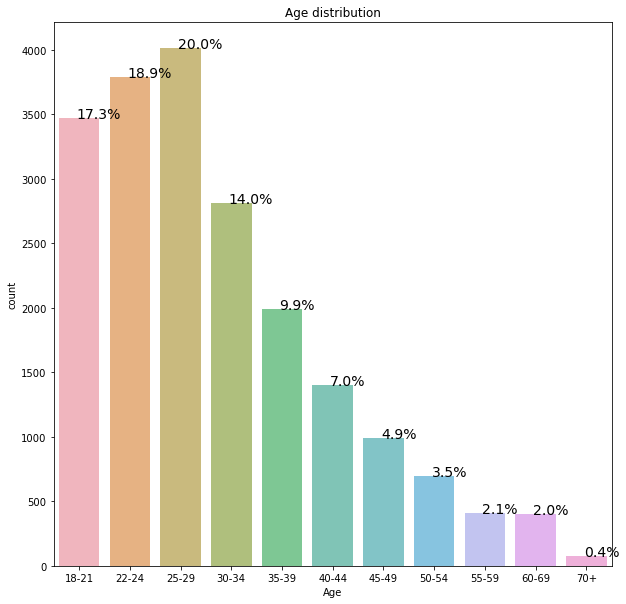

In [13]:
# age plot
plt.figure(figsize=(10,10))
sorted_data= mydata.sort_values('Q1')
ax=sns.countplot(x='Q1', data=sorted_data,alpha=0.7)
plt.xlabel('Age')
plt.title('Age distribution')
bar_percentage(ax,mydata['Q1'])


We can see that more than 50% of the responders are under 30 years old.

In [14]:
#Group other values into one  
f=mydata['Q2'].apply(lambda x : 'other' if x not in ['Man', 'Woman'] else x)

f

1          Man
2          Man
3          Man
4          Man
5          Man
         ...  
20032      Man
20033    Woman
20034      Man
20035      Man
20036      Man
Name: Q2, Length: 20036, dtype: object

In [15]:
#Gender plot
fig = px.pie(f.index,f.values)
fig.update_layout(title_text='Gender distribution', title_x=0.5)

fig.show()

We can see that more than 70% of the responders(data scientists) were men.

In [16]:
#Gender Vs. Age
fig = px.density_heatmap(mydata, x=f,y='Q1')
fig.update_layout(title_text='Age distribution over Gender', title_x=0.5)

fig.update_xaxes(title_text='Gender')
fig.update_yaxes(title_text='Age ', title_standoff = 35)
fig.show()

We can see that most men are in thier 25-29 years and most women in their 22-24 years.

In [17]:
#From where are you?
s=mydata['Q3'].value_counts().drop('Other')
s=s[:20,]

fig = px.pie( values=s.values,names=s.index,hole=.2)
fig.update_layout(title_text='Top 20 Countries', title_x=0.5,showlegend=False)



fig.show()

The majority of the data scientists are from India, the USA, and Brazil.

In [18]:
#ppl with 1-2 and fewer coding years by country
a=mydata[(mydata['Q6']=='1-2 years') | (mydata['Q6']=='< 1 years')].Q3.value_counts()
a=a[:20,].drop('Other')
fig = px.pie( values=a.values,names=a.index)
fig.update_layout(title_text='Scientiests with 1-2 or fewer coding years By country', title_x=0.5,showlegend=False)



fig.show()


It shown that data scientits with 1-2 coding years or less are mostly from: India, USA, Nigeria, and Russia. 

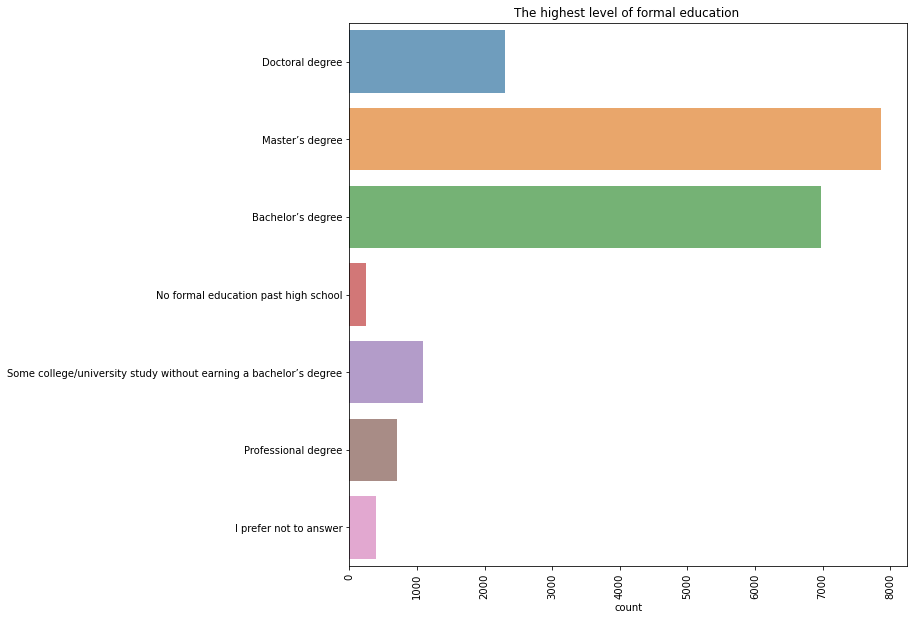

In [19]:
#Level of education
plt.figure(figsize=(10,10))

ax=sns.countplot(y='Q4', data=mydata,alpha=0.7)
plt.ylabel('')
plt.title('The highest level of formal education ')
plt.xticks(rotation=90)

plt.show()

It shows that more than 70% have a Bachelor or/and Master degree.

In [20]:
# 1-2 and less exp and their level of education 
t= mydata[mydata['Q6']=='1-2 years'].Q4.value_counts()
t1=mydata[mydata['Q6']=='< 1 years'].Q4.value_counts()

In [21]:
#Coding years percentages 
mydata['Q6'].value_counts(normalize=True)

3-5 years                    0.237762
1-2 years                    0.235617
< 1 years                    0.173274
5-10 years                   0.133473
10-20 years                  0.091579
20+ years                    0.069508
I have never written code    0.058787
Name: Q6, dtype: float64

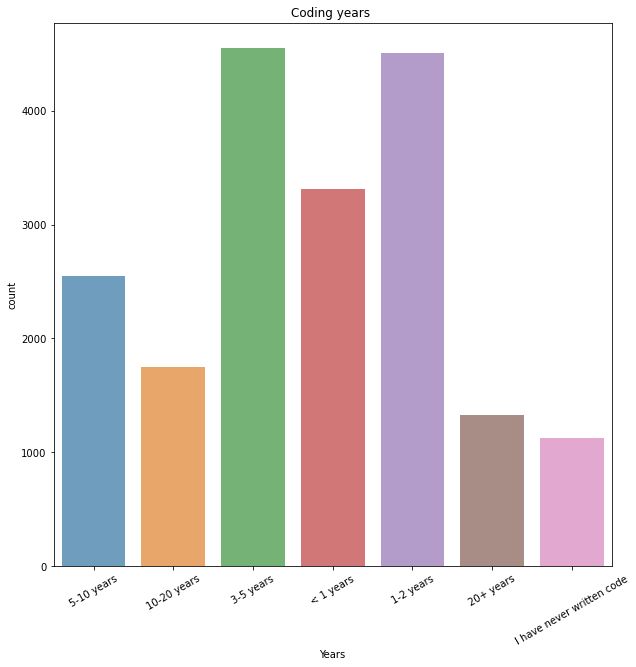

In [22]:
#coding years plot
plt.figure(figsize=(10,10))
ax=sns.countplot(x='Q6', data=mydata,alpha=0.7)
plt.xticks(rotation=30)

plt.xlabel('Years')
plt.title('Coding years ')
plt.show()

The majority of the responders have been 1-2 or 3-5 years writing code and/or programming

In [23]:
#Q5 : most recent role vs coding years
fig = px.density_heatmap(mydata, x='Q6',y='Q5')
fig.update_layout(title_text='Most recent role Vs. Years of coding', title_x=0.5)
fig.update_xaxes(title_text='Coding years',title_standoff = 35)

fig.update_yaxes(title_text='Role',title_standoff = 35)
fig.show()

Most of the responders were either students or data scientists. Responders with 1-2 and less coding years were mostly students.

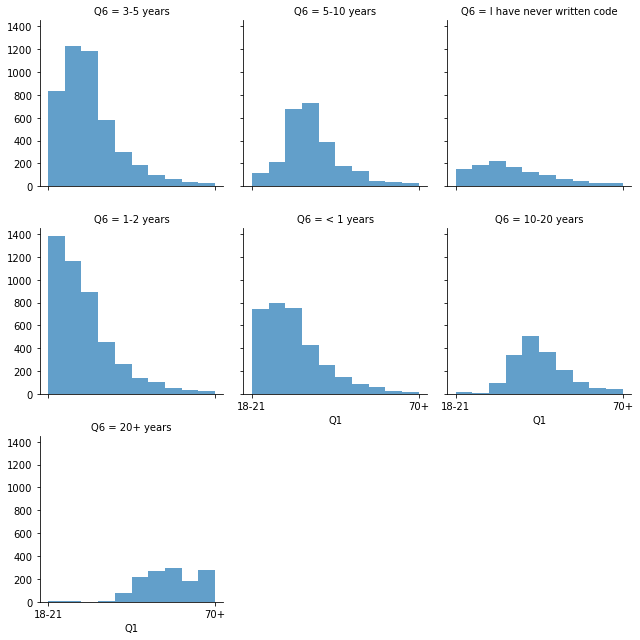

In [24]:
#AGe and coding years
sorted_data= mydata.sort_values('Q1')

grid = sns.FacetGrid(sorted_data, col="Q6",col_wrap=3,margin_titles=True)
grid.map(plt.hist, "Q1",alpha=.7)
grid.set(xticks=['18-21', '70+'] )
#grid.add_legend()



The majority of the young responders, who in their early 20's, have 1-2 coding years.

In [25]:
#gender by Years of coding
d=mydata[mydata['Q2']=='Man'].Q6.value_counts()
d1=mydata[mydata['Q2']=='Woman'].Q6.value_counts()

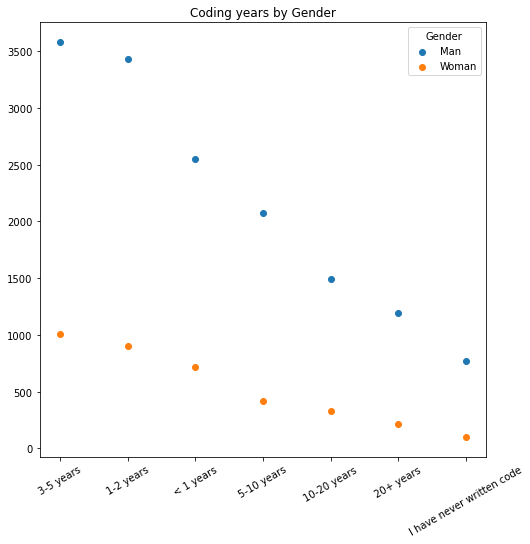

In [26]:
#gender vs Years of coding plot
plt.figure(figsize=(8,8))
plt.scatter(x=d.index,y=d.values,label='Man')
plt.scatter(x=d.index,y=d1.values,label='Woman')
plt.xticks(rotation=30)
plt.title('Coding years by Gender')
plt.legend(title='Gender')
plt.show()

we can see that most Men have 3-5 years of coding, whereas women have 1-2 years. There are also more men with 20+ experince than women.

In [27]:
mydata['Q8'].value_counts(normalize=True)

Python        0.799113
R             0.070647
SQL           0.047640
C++           0.018237
C             0.016890
MATLAB        0.010942
Java          0.009371
Other         0.008473
Julia         0.006790
Javascript    0.004938
None          0.004545
Bash          0.001459
Swift         0.000954
Name: Q8, dtype: float64

Text(0.5, 1.0, 'Top 5 most recommended Programming languagues')

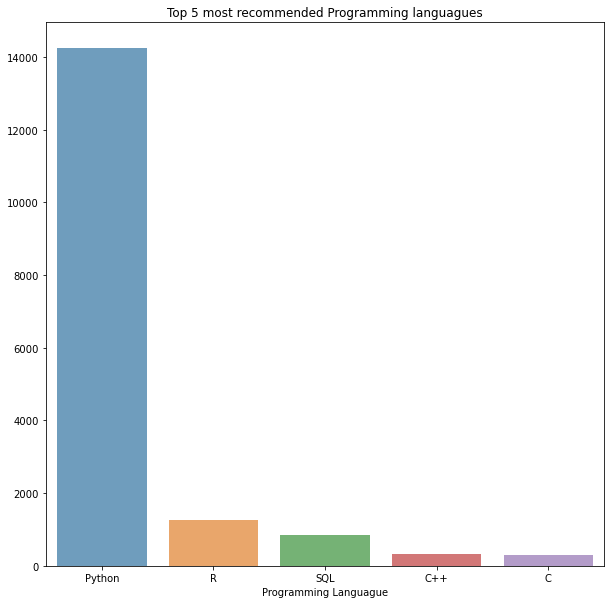

In [28]:
plt.figure(figsize=(10,10))
PL_count  = mydata['Q8'].value_counts()
PL_count = PL_count[:5,]
ax=sns.barplot(PL_count.index, PL_count.values, alpha=0.7)
plt.xlabel("Programming Languague")
plt.title('Top 5 most recommended Programming languagues')

We can see that Python has been chosen by more than 70% of the responders as the most recommended language to use as a beigniner data scientiest.

In [29]:
#Recommended lang vs Age group
q=mydata['Q8'].value_counts()
q=q[:11,]
q1=mydata['Q1'].value_counts()

fig = px.bar(mydata, x=q.values, y=q1.index, color=q.index,orientation='h')
fig.update_layout(title_text='Most recommended language by Age group', title_x=0.5)
fig.update_xaxes(title_text='Count')
fig.update_yaxes(title_text='Age group',title_standoff = 35)


fig.show()

The most recommended languagues from age of 18-29 are: Python, R, and SQL.

# Insight into data scientists with 1-2 and fewer coding years.

In [30]:
df=mydata
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


In [31]:
#combine questions with multiple answers in new col
#most used programming language 
source_col_loc = df.columns.get_loc('Q7_Part_1') # column position starts from 0

df['programming_lang'] = df.iloc[:,source_col_loc:source_col_loc+11].apply(
    lambda x: ",".join(x.dropna().astype(str)), axis=1)

#IDE
source_col = df.columns.get_loc('Q9_Part_1') # column position starts from 0

df['IDE'] = df.iloc[:,source_col:source_col+11].apply(
    lambda x: ",".join(x.dropna().astype(str)), axis=1)

#favorite notebook
source_col0 = df.columns.get_loc('Q10_Part_1') # column position starts from 0

df['notebook'] = df.iloc[:,source_col0:source_col0+13].apply(
    lambda x: ",".join(x.dropna().astype(str)), axis=1)


#most used visulization libraries
source_col0 = df.columns.get_loc('Q14_Part_1') # column position starts from 0

df['vis_library'] = df.iloc[:,source_col0:source_col0+11].apply(
    lambda x: ",".join(x.dropna().astype(str)), axis=1)


#activities that play part in their daily work
source_col0 = df.columns.get_loc('Q23_Part_1') # column position starts from 0

df['work_activity'] = df.iloc[:,source_col0:source_col0+7].apply(
    lambda x: ",".join(x.dropna().astype(str)), axis=1)


#most used big data products
source_col0 = df.columns.get_loc('Q29_A_Part_1') # column position starts from 0

df['bigData_products'] = df.iloc[:,source_col0:source_col0+17].apply(
    lambda x: ",".join(x.dropna().astype(str)), axis=1)


#where do you learn ? 
source_col0 = df.columns.get_loc('Q37_Part_1') # column position starts from 0

df['learning_platform'] = df.iloc[:,source_col0:source_col0+11].apply(
    lambda x: ",".join(x.dropna().astype(str)), axis=1)


#favorite media sources that report on data science topics
source_col0 = df.columns.get_loc('Q39_Part_1') # column position starts from 0

df['data_social'] = df.iloc[:,source_col0:source_col0+11].apply(
    lambda x: ",".join(x.dropna().astype(str)), axis=1)

In [32]:
#drop columns
#df.drop(df.iloc[:, 7:19], inplace = True, axis = 1) 
  

In [33]:
#PL and 1-2 or fewer coding years
a=df[(df['Q6']=='1-2 years') | (df['Q6']=='< 1 years')].programming_lang.value_counts()
a=a[:3,]
fig = px.bar( y=a.values, x=a.index,orientation='v')
fig.update_traces(marker_color='lightgreen')
fig.update_layout(title_text='Most used languague ', title_x=0.5)
fig.update_yaxes(title_text='Count')
fig.update_xaxes(title_text='Programming Languague')
fig.show()

In [34]:
#IDE and 1-2 or fewer coding years
a=df[(df['Q6']=='1-2 years') | (df['Q6']=='< 1 years')].IDE.value_counts()
a=a[:3,]
fig = px.bar( x=a.values, y=a.index)
fig.update_traces(marker_color='lightblue')
fig.update_layout(title_text='Most used IDE', title_x=0.5)

fig.update_xaxes(title_text='Count')
fig.show()

In [35]:
#Notebook and 1-2 or fewer coding years
a=df[(df['Q6']=='1-2 years') | (df['Q6']=='< 1 years')].notebook.value_counts()
a=a[:4,].drop('None')
fig = px.bar( y=a.values, x=a.index,orientation='v')
fig.update_traces(marker_color='lightpink')

fig.update_layout(title_text='Most used Notebook ', title_x=0.5)
fig.update_yaxes(title_text='Count')
fig.update_xaxes(title_text='Notebook')
fig.show()

In [36]:
#Visulization library
a=df[(df['Q6']=='1-2 years') | (df['Q6']=='< 1 years')].vis_library.value_counts()
a=a[:6,].drop('')
fig = px.scatter(a,size=[100,80, 60, 40, 20])
fig.update_layout(title_text='Most used Visulization library ', title_x=0.5,showlegend=False)
fig.update_yaxes(title_text='Count')
fig.update_xaxes(title_text='Vislization Library')
fig.show()

In [37]:
#learning platform
a=df[(df['Q6']=='1-2 years') | (df['Q6']=='< 1 years')].learning_platform.value_counts()
a=a[:6,].drop('')
fig = px.scatter(a,size=[100,80, 60, 40, 20])
fig.update_traces(marker_color='lightgreen')
fig.update_layout(title_text='Most used Learning Platform ', title_x=0.5,showlegend=False)
fig.update_yaxes(title_text='Count')
fig.update_xaxes(title_text='Learning Platform')
fig.show()


In [38]:
#favorite media sources that report on data science topics
a=df[(df['Q6']=='1-2 years') | (df['Q6']=='< 1 years')].data_social.value_counts()
a=a[:5,].drop('')
fig = px.bar(x=a.index,y=a.values)
fig.update_traces(marker_color='pink')

fig.update_layout(title_text='Favorite data media source ', title_x=0.5,showlegend=False)
fig.update_yaxes(title_text='Count')
fig.update_xaxes(title_text='Social media source',)
fig.show()

In [39]:
#big data product
a=df[(df['Q6']=='1-2 years') | (df['Q6']=='< 1 years')].bigData_products.value_counts()
a=a[:5,].drop('')
fig = px.bar( y=a.values, x=a.index,orientation='v')
fig.update_traces(marker_color='lightblue')

fig.update_layout(title_text='Most used big data products ', title_x=0.5)
fig.update_yaxes(title_text='Count')
fig.update_xaxes(title_text='Data product')
fig.show()